In [1]:
import matplotlib.pyplot as plt
import numpy as np

import methods
import DanyaLab2.methods as methods2

In [2]:
from scipy.optimize import approx_fprime
import math

np.random.seed(12)


def grad_calculator(x, func, dim):
    h = 1e-5
    res = []
    for i in range(dim):
        delta = np.zeros(dim)
        delta[i] = h
        res.append((func(x + delta) - func(x - delta)) / (2 * h))
    return np.asarray(res)

In [3]:
def grad_func(f, dim):
    return lambda x: grad_calculator(x, f, dim)


def target_func(x):
    return 0.001 * x[0] ** 2 + x[1] ** 2


expected = [0, 0]

dim = 2
f = target_func
grad = grad_func(f, dim)
hess = lambda x0: approx_fprime(x0, lambda t: approx_fprime(t, f))

start = [-3.3779810688182277, 1.7908334798923486]

In [4]:
def points_over_contour(points, f, a, levels=30):
    t = np.linspace(-a, a, 100)
    X, Y = np.meshgrid(t, t)
    fig, ax = plt.subplots()
    ax.contour(X, Y, f(np.stack((X, Y))), levels=levels)
    l, = ax.plot(points[:, 0], points[:, 1], 'o-', markersize=5, alpha=0.8)
    ax.plot(points[-1, 0], points[-1, 1], 'x', markersize=10)
    return ax, l


def multiple_points_over_contour(f, points, names, colors):
    a = 3
    for p in points:
        a = max(a, -np.min(p), np.max(p)) + 0.1
    (ax, l1) = points_over_contour(points[0], f, a)
    ls = [l1]
    for i in range(1, len(points)):
        l, = ax.plot(points[i][:, 0], points[i][:, 1], 'o-', markersize=5, color=colors[i], alpha=0.8)
        ax.plot(points[i][-1, 0], points[i][-1, 1], 'x', color=colors[i], markersize=10)
        ls.append(l)

    ax.legend(ls, names, loc='upper right', shadow=True)
    return plt

In [5]:
def print_table(infos, names):
    for i, info in enumerate(infos):
        print("{} & {}  \\\\".format(names[i], info[0][-1]))

    print("===============Table===============")
    for i, info in enumerate(infos):
        print("\hline")
        print("{} & \\seqsplit{{{:.4f}}} & {} & {} & {:.4f} & {} \\\\".format(names[i],
                                                                              np.linalg.norm(expected - info[0][-1]),
                                                                              info[1],
                                                                              info[2], info[3], info[4]))


BFGS & [-2.64398274e-06 -2.81460567e-06]  \\
L-BFGS & [-2.64398274e-06 -2.81460567e-06]  \\
Powell Dog Leg & [4.74356634e-06 5.17952499e-19]  \\
AdaGrad & [-3.37127421  0.21334051]  \\
RMSProp & [-3.32386164e+00 -2.87851235e-11]  \\
Adam & [0.24672864 0.00110909]  \\
===============Table===============
\hline
BFGS & \seqsplit{0.0000} & 8 & 7 & 0.0059 & 8874 \\
\hline
L-BFGS & \seqsplit{0.0000} & 13 & 9 & 0.0041 & 5704 \\
\hline
Powell Dog Leg & \seqsplit{0.0000} & 14 & 14 & 0.0502 & 39903 \\
\hline
AdaGrad & \seqsplit{3.3780} & 1001 & 0 & 0.2834 & 137779 \\
\hline
RMSProp & \seqsplit{3.3239} & 1001 & 0 & 0.1829 & 141039 \\
\hline
Adam & \seqsplit{0.2467} & 1001 & 0 & 0.2561 & 138196 \\


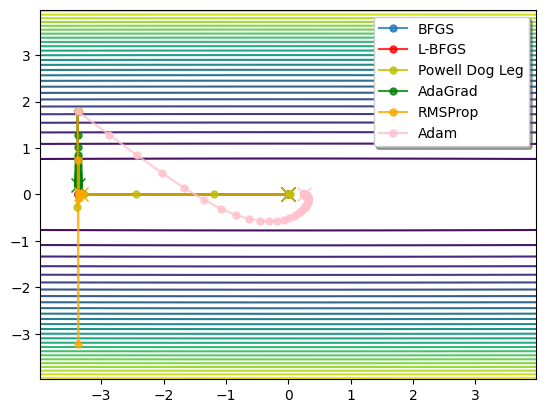

In [6]:
infos = []
points = []

names = ["BFGS", "L-BFGS", "Powell Dog Leg", "AdaGrad", "RMSProp", "Adam"]
colors = ['', 'r', 'y', 'g', 'orange', 'pink', 'cyan', 'black', 'magenta', 'maroon']
lr = lambda epoch: 0.5 * math.exp(-0.1 * epoch)
maxit = 1000

infos.append(methods.bfgs(f, grad, start.copy(), max_iter=maxit))
points.append(infos[-1][0])

infos.append(methods.l_bfgs(f, grad, start.copy(), max_iter=maxit))
points.append(infos[-1][0])

infos.append(methods.trust_region_dogleg(f, grad, hess, start.copy(), max_iter=20))
points.append(infos[-1][0])

infos.append(methods2.sgd_adagrad(f, grad, start.copy(), learning_rate=lr, max_iter=maxit))
points.append(infos[-1][0])

infos.append(methods2.sgd_rmsprop(f, grad, start.copy(), learning_rate=lr, max_iter=maxit))
points.append(infos[-1][0])

infos.append(methods2.sgd_adam(f, grad, start.copy(), learning_rate=lr, max_iter=maxit))
points.append(infos[-1][0])

print_table(infos, names)
multiple_points_over_contour(f, points, names, colors).show()